# Import Library

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from sklearn.metrics import mean_absolute_error

In [5]:
from sklearn.datasets import load_boston
boston_data = load_boston()

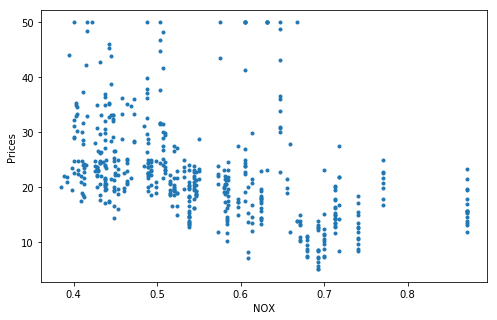

In [6]:
x = boston_data.data[:,4]
y = boston_data.target
plt.xlabel('NOX')
plt.ylabel('Prices')
plt.plot(x, y,'.')
data_x = pd.DataFrame(x,columns=['x'])
data_y = pd.DataFrame(y,columns=['y'])

# 1. Generate New Features with higher power 
自行產生新的feature，x^2～x^15

In [7]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data_x[colname] = data_x['x']**i

data_x.head()

,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.538,0.289444,0.155721,0.083778,0.045072,0.024249,0.013046,0.007019,0.003776,0.002032,0.001093,0.000588,0.000316,0.000170,0.000092
1,0.469,0.219961,0.103162,0.048383,0.022692,0.010642,0.004991,0.002341,0.001098,0.000515,0.000241,0.000113,0.000053,0.000025,0.000012
2,0.469,0.219961,0.103162,0.048383,0.022692,0.010642,0.004991,0.002341,0.001098,0.000515,0.000241,0.000113,0.000053,0.000025,0.000012
3,0.458,0.209764,0.096072,0.044001,0.020152,0.009230,0.004227,0.001936,0.000887,0.000406,0.000186,0.000085,0.000039,0.000018,0.000008
4,0.458,0.209764,0.096072,0.044001,0.020152,0.009230,0.004227,0.001936,0.000887,0.000406,0.000186,0.000085,0.000039,0.000018,0.000008


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x.values, data_y.values, test_size=0.33, 
                                                    random_state= 40, shuffle=False)

# 0. Function definition

In [9]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
def example_regression(X_train, X_test, y_train, y_test, power, plot_dict, reg_type, alpha = 0):
    # define estimator object
    type_dict = {'Linear':LinearRegression(normalize=True),
                 'Lasso':Lasso(alpha = alpha, normalize=True),
                 'Ridge':Ridge(alpha = alpha, normalize=True)}
    
    # generate X in order
    #Xtrain = Xtrain[:, 0:power]
    #Xtest = Xtest[:, 0:power]
    
    # fit the model
    if reg_type in type_dict:
        model = type_dict[reg_type]
    model.fit(X_train[:, 0:power],y_train[:, 0:power])
    y_train_pred = model.predict(X_train[:, 0:power])
    train_mae = mean_absolute_error(y_train_pred, y_train[:, 0:power])
    y_test_pred = model.predict(X_test[:, 0:power])
    test_mae = mean_absolute_error(y_test_pred, y_test[:, 0:power])
    # check if a plot is to be made for the entered power
    if power in plot_dict:
        plt.subplot(plot_dict[power])
        plt.tight_layout()
        plt.plot(X_train[:, 0],y_train,'.')
        plt.plot(X_train[:, 0],y_train_pred,'.')
        plt.title('Plot for power: %d'%power + '\n' + 'train_mae:%.2f'%train_mae)
        
    # return the result in pre-defined format
    ret = [train_mae]
    ret.extend([test_mae])
    ret.extend([model.intercept_[0]])
    for i in range(power):
        ret.extend([model.coef_[0,i]])
    return ret

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


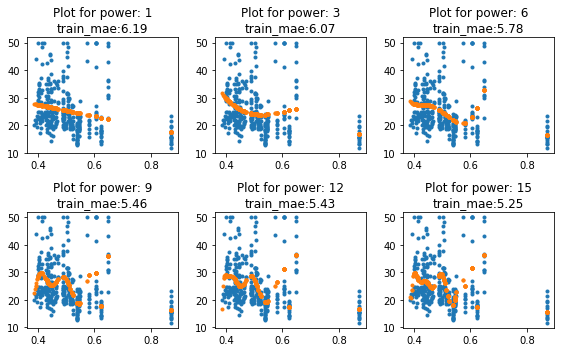

In [10]:
# initialize a dataframe to store the results:
col = ['train_mae', 'test_mae','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['pow_%d'%i for i in range(1,16)]

perf_Linear = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required: {power:where}
plot_dict = {1:231,3:232,6:233,9:234,12:235,15:236}

# iterate through all powers and assimilate results
for i in range(1,16):
    perf_Linear.iloc[i-1,0:i+3] = example_regression(X_train, X_test, y_train, y_test, 
                                  power=i, plot_dict=plot_dict,reg_type='Linear')

In [11]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Linear

,train_mae,test_mae,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
pow_1,6.2,7.6,36,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_2,6.2,7.5,37,-24,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_3,6.1,10,2.3e+02,-1e+03,1.7e+03,-9.2e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_4,5.8,18,-1.6e+03,1.2e+04,-3.2e+04,3.8e+04,-1.6e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_5,5.8,30,5.3e+03,-5.1e+04,2e+05,-3.7e+05,3.5e+05,-1.2e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_6,5.8,29,6.5e+03,-6.5e+04,2.6e+05,-5.2e+05,5.5e+05,-2.7e+05,4.2e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_7,5.8,20,-4.1e+04,5.5e+05,-3.2e+06,1e+07,-1.9e+07,2.1e+07,-1.3e+07,3.2e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_8,5.5,8.7e+02,-9.8e+06,1.5e+08,-9.9e+08,3.7e+09,-8.7e+09,1.3e+10,-1.2e+10,6.1e+09,-1.4e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_9,5.5,2.5e+03,4.1e+07,-7.2e+08,5.7e+09,-2.6e+10,7.4e+10,-1.4e+11,1.8e+11,-1.4e+11,6.7e+10,-1.4e+10,NaN,NaN,NaN,NaN,NaN,NaN
pow_10,5.5,4.3e+03,-7.3e+07,1.5e+09,-1.3e+10,7.1e+10,-2.5e+11,5.9e+11,-9.6e+11,1.1e+12,-7.8e+11,3.3e+11,-6.3e+10,NaN,NaN,NaN,NaN,NaN
